# Leaky Integrate and Fire(LIF) 모델을 구현해보자
> 본 노트북은 Euijin's blog의 [SNN Basic Tutorial](https://jinprelude.github.io/categories/snn-basic-tutorial/) 시리즈 중 LIF 모델 구현을 다룹니다. [SNN Basic Tutorial](https://jinprelude.github.io/categories/snn-basic-tutorial/)를 먼저 읽고 오시면 더욱 수월한 이해가 가능합니다.

코드의 흐름은 다음과 같습니다:



1.   뉴런 클래스 생성
2.   main 함수 생성
3.   main 함수에서 뉴런 클래스 인스턴스 생성
4.   n초의 시간동안 뉴런에 전류를 가하고 매 순간마다 뉴런의 membrane potential 기록
5.   시간에 따른 membrane potential을 그래프로 시각화하여 출력

먼저 뉴런 클래스를 생성하겠습니다.





# 뉴런 클래스 만들기
LIF의 action potential 공식은 다음과 같습니다:
$$ 	\tau_{m}\frac{du}{dt}=−[u(t)−u_{rest}]+RI(t)$$
식에서:
- $\tau_m$ : 뉴런의 시정수(Time constant)를 나타냅니다. 코드에서는 `self.tau` 입니다.
- $\frac{du}{dt}$ : membrane potential의 순간변화량을 나타냅니다.
- $u(t)$ : 시간 $t$ 에서의 membrane potential을 나타냅니다. 코드에서는 `self.membrane_potential` 입니다.
- $u_{rest}$: membrane의 resting voltage를 뜻합니다. 코드에서는 `self.mv_rest` 입니다.
- $R$: membrane의 저항을 뜻합니다. 코드에서는 저항의 역수인 컨덕턴스로 쓰이며 `self.g` 입니다.
- $I(t)$: 시간 $t$ 에서의 입력 전류를 뜻합니다. 코드에서는 `input_current_pa` 입니다.

위 식을  다음과 같이 변형하여 membrane potential의 순간변화량을 구할 수 있습니다:

$$ \frac{du}{dt}=\frac{−[u(t)−u_{rest}]+RI(t)}{\tau_{m}}$$

LIF 모델을 구현하는데에 필요한 변수들은 다음과 같습니다:


*   Membrane potential의 resting voltage [$-65mV$]
*   Membrane potential의 threshold voltage [$-55mV$]
*   Membrane potential의 reset voltage [$-70mV$]
*   시정수 $\tau_{m}$ [$10$]
*   저항 $R$ [0.1]

중괄호에 적힌 수치들은 아래 코드에서 기본값으로 쓰일 수치입니다.

주석과 함께 아래 코드를 분석해보겠습니다.

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
class LifNeuron:
  def __init__(self, mv_reset = -70, mv_threshold  = -55, mv_rest = -65, tau = 10, g = 10):
    self.mv_reset = mv_reset  # resting voltage, mV
    self.mv_threshold = mv_threshold  # threshold voltage, mV
    self.mv_rest = mv_rest  # rest voltage, mV
    self.tau = tau  # tau
    self.g = g  # conductance, nanosiemens, nS

    self.membrane_potential = self.mv_reset # 현재의 membrane potential을 저장할 변수를 추가하고, rest voltage로 초기화한다.
  
  def step(self, input_current_pa = 0, dt = 0.001):
    """
    delta t 의 크기와 delta t 동안 흐르는 전류의 양을 입력받고, 뉴런의 다양한 값들을 반환한다.
    
    Inputs
    ------
    input_current_pa : 주입되는 전류량. 단위는 pA(피코암페어)이다.
    dt : delta t의 크기. 기본값은 millisecond인 0.001초이다.

    Return
    ------
    infos [Dict]
      - membrane_potential : 현재 membrane potential 값, mV.
      - is_spike : 현재 뉴런의 action potential이 생성되었는지를 booloean 값으로 반환.

    """
    is_spike = False   # 
    self.membrane_potential += (-(self.membrane_potential - self.mv_reset) + self.g * input_current_pa)* dt / self.tau
    if self.membrane_potential >= self.mv_threshold :
      is_spike = True
      self.membrane_potential = self.mv_reset
    infos = {
        "membrane_potential": self.membrane_potential,
        "is_spike": is_spike
    }

    return infos




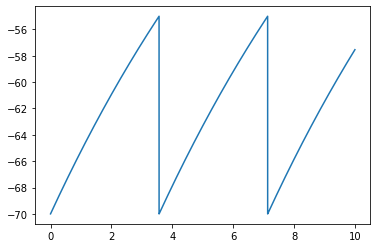

In [ ]:


if __name__=="__main__":
  observe_ms = 10000 # millisecond, 10초동안 관찰

  neuron1 = LifNeuron() # 뉴런 생성
  membrane_potential_history = [] # 10초동안의 membrane potential을 기록할 리스트, y축
  dt_history = [i/1000 for i in range(observe_ms)]  # 시간(초), x축
  
  for ms in range(observe_ms):
    infos = neuron1.step(input_current_pa = 500, dt = 0.001)
    membrane_potential_history.append(infos["membrane_potential"])

  plt.plot(dt_history, membrane_potential_history)
  plt.show()
